# COVID-19 cases Feb-Aug 2020 dynamics plots
 
## Countries of interest:

 * USA
 * India
 * Russia
 * Turkey
 * Canada
 * Spain
 * Italy
 * Mexico
 * Ukraine
 
## Goal:

To build plots, which answers the following questions:  
 * How does the dynamics of COVID19 propagation change for chosen countries?
 * How changes the distribution of new cases, mortality and recovery rate for each country?  
 
## Links: 

 * COVID-19 confirmed cases time series:
 
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
 
 
 * COVID-19 deaths time series:
 
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
 
* COVID-19 recovered time series:

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv



In [74]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
csv_confirmed_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed=pd.read_csv(csv_confirmed_path)
csv_deaths_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths=pd.read_csv(csv_deaths_path)
csv_recov_path='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recov=pd.read_csv(csv_recov_path)

In [76]:
#Aggregate data on monthly basis
for j in range(2,9):
    rows=[]
    for i in range(4,216):
        if df_confirmed.columns[i][:1]==str(j):
            rows.append(df_confirmed.columns[i])
    df_confirmed[str(j)+'.20']=df_confirmed.apply(lambda x:np.max(x[rows]),axis=1)
    df_deaths[str(j)+'.20']=df_deaths.apply(lambda x:np.max(x[rows]),axis=1)
    df_recov[str(j)+'.20']=df_recov.apply(lambda x:np.max(x[rows]),axis=1)

In [77]:
#Aggregate data on country basis
df_conf=df_confirmed.groupby('Country/Region').agg({'2.20':np.sum})
df_d=df_deaths.groupby('Country/Region').agg({'2.20':np.sum})
df_r=df_recov.groupby('Country/Region').agg({'2.20':np.sum})
for j in range(3,9):
    df_conf[str(j)+'.20']=df_confirmed.groupby('Country/Region').agg({str(j)+'.20':np.sum})
    df_d[str(j)+'.20']=df_deaths.groupby('Country/Region').agg({str(j)+'.20':np.sum})
    df_r[str(j)+'.20']=df_recov.groupby('Country/Region').agg({str(j)+'.20':np.sum})

In [79]:
#Looking at countries with the largest number of confirmed COVID-19 cases as of Aug2020
df_conf=df_conf.sort_values(['8.20'], ascending=False)
df_conf.head()

,2.20,3.20,4.20,5.20,6.20,7.20,8.20
Country/Region,,,,,,,
US,24,193044,1074879,1799585,2636710,4562419,5574133
Brazil,2,5717,87187,514849,1402041,2662485,3501975
India,3,1397,34863,190609,585481,1695988,2905825
Russia,2,2337,106498,405843,646929,838461,939833
South Africa,0,1353,5647,32683,151209,493183,599940


In [80]:
#Create list of countries of interest
Countries_list=['US','India','Russia','Turkey','Canada','Spain','Italy','Mexico','Ukraine']

<IPython.core.display.Javascript object>


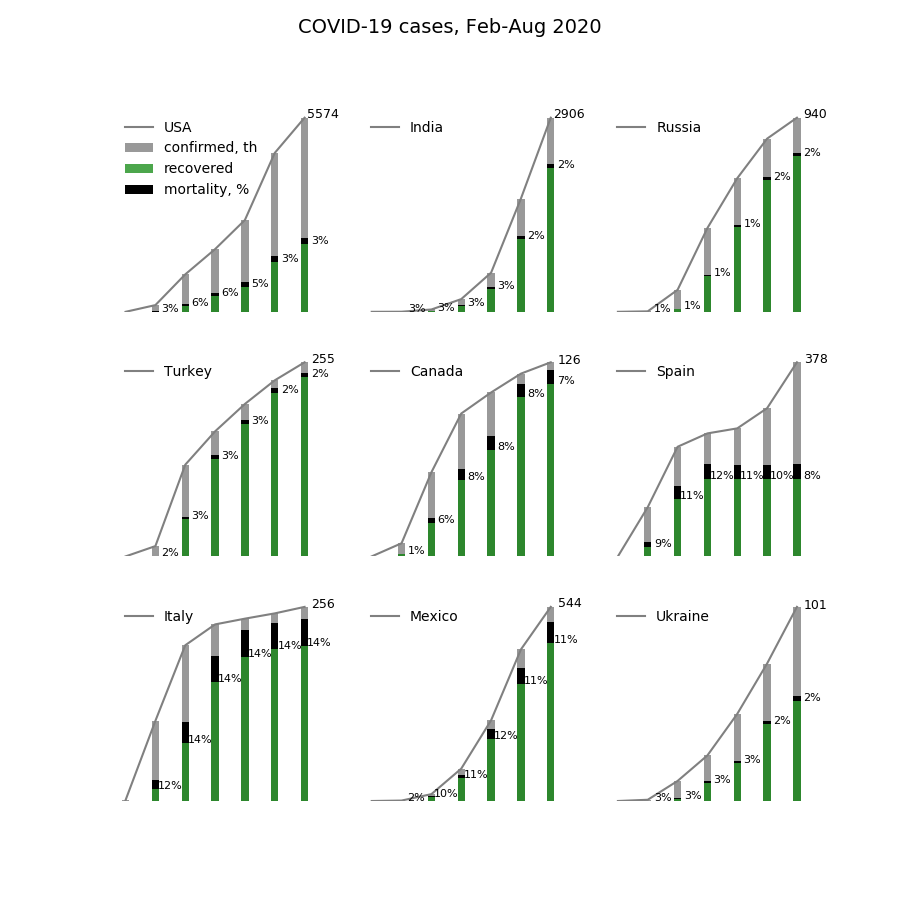

Text(0.5, 0.98, 'COVID-19 cases, Feb-Aug 2020')

In [84]:
# Make subplots, showing the dynamics of COVID-19 propagation in countries of interest, including mortality and recovery rates 
dates=df_conf.columns.tolist()
xvals=np.arange(len(dates))
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,sharex=True,figsize=(9,9))
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
j=0
for country in Countries_list:
    bars=axs[j].bar(xvals,df_conf.loc[country,:],width=0.25,color='grey',alpha=0.8)
    axs[j].text(bars[6].get_x()+bars[6].get_width()*3,bars[6].get_height()-1000,str(round(int(bars[6].get_height())/1000)),ha='center',color='black',fontsize=9)

#Label all of the confirmed bars with figures    
    #for bar in bars:
    #    axs[j].text(bar.get_x()+bar.get_width()*2.5,bar.get_height()-1000,str(round(int(bar.get_height())/1000))+'t',ha='center',color='grey',fontsize=9)

    bars_r=axs[j].bar(xvals,df_r.loc[country,:],width=0.25, color='g',alpha=0.7)

#Label bars of recovered with recovery% 
    #for i in range(3,7):
    #    if int(bars[i].get_height())==0:
    #        axs[j].text(bars_r[i].get_x()+bars_r[i].get_width()*2.5,bars_r[i].get_height(),str(0)+'%',ha='center',color='g',fontsize=8)
    #    else:    
    #        axs[j].text(bars_r[i].get_x()+bars_r[i].get_width()*2.5,5000,str(round((int(bars_r[i].get_height())/int(bars[i].get_height()))*100))+'%',ha='center',color='g',fontsize=8)
    

    bars_d=axs[j].bar(xvals,df_d.loc[country,:],width=0.25, bottom=df_r.loc[country,:], color='black')

    for i in range(1,7):
        if int(bars[i].get_height())==0:
            axs[j].text(bars_d[i].get_x()+bars_d[i].get_width()*2.5,bars_d[i].get_height()+bars_r[i].get_height()-5,str(0)+'%',ha='center',color='black',fontsize=8)
        else:    
            axs[j].text(bars_d[i].get_x()+bars_d[i].get_width()*2.5,bars_r[i].get_height(),str(round((int(bars_d[i].get_height())/int(bars[i].get_height()))*100))+'%',ha='center',color='black',fontsize=8)
    
    axs[j].plot(xvals,df_conf.loc[country,:],color='grey')

    axs[j].legend([country],frameon=False)
    
    axs[j].tick_params(top=False,bottom=False,left=False,right=False,labelleft=False,labelbottom=False)
    for spine in axs[j].spines.values():
        spine.set_visible(False)
    j+=1  
fig = plt.gcf()
ax1.legend(['USA','confirmed, th','recovered','mortality, %'],frameon=False)
fig.suptitle("COVID-19 cases, Feb-Aug 2020", fontsize=14)
